<a href="https://colab.research.google.com/github/VihangaMalith/Customer-Churn-Project/blob/main/CW_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from imblearn.over_sampling import SMOTE

from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

###Load Preprocessed Dataset

In [2]:
from google.colab import files
upload = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [3]:
df = pd.read_csv("/content/preprocessed_data.csv")
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,TenureGroup,TotalServices,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,-0.440327,-0.965608,-0.652305,0.430998,-3.056334,0.828939,-0.523477,-0.091370,Loyal,-0.176214,...,False,True,False,True,False,False,False,False,False,True
1,-0.440327,-0.965608,-0.652305,-1.198760,0.327189,-1.206361,-0.378881,-0.924111,New,-0.661199,...,False,True,False,False,False,False,True,False,False,True
2,-0.440327,1.035617,-0.652305,0.919926,0.327189,0.828939,0.430523,0.959516,Loyal,-0.176214,...,False,False,False,False,False,False,False,True,False,True
3,-0.440327,1.035617,1.533025,0.512486,0.327189,-1.206361,-0.337331,0.119297,Loyal,-0.176214,...,False,False,False,False,False,True,False,False,False,False
4,-0.440327,1.035617,1.533025,0.919926,0.327189,-1.206361,1.200040,1.396490,Loyal,0.793756,...,False,True,False,True,True,False,False,False,True,False


###Splittting train/test dataset into X & y And apply SMOTE

In [4]:
# Identify and one-hot encode all object type columns
categorical_cols = df.select_dtypes(include='object').columns

# Exclude the target variable if it's accidentally identified as object
if 'Churn_Yes' in categorical_cols:
    categorical_cols = categorical_cols.drop('Churn_Yes')

if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integers (0 or 1)
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape

((8308, 36), (8308,))

##ANN (Artificial Neural Network)

###Build ANN Architecture

In [5]:
#Define a multi-layer neural network for churn classification.
model = Sequential()
model.add(Input(shape=(X_train_resampled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

###Compile ANN

In [6]:
#We use Adam optimizer and binary crossentropy loss.
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

###Train ANN

In [7]:
#Train with validation split to monitor learning.
history = model.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6902 - loss: 0.5697 - val_accuracy: 0.7762 - val_loss: 0.5443
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7661 - loss: 0.4793 - val_accuracy: 0.7804 - val_loss: 0.5377
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7852 - loss: 0.4611 - val_accuracy: 0.7677 - val_loss: 0.5382
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7840 - loss: 0.4581 - val_accuracy: 0.7774 - val_loss: 0.5291
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7861 - loss: 0.4519 - val_accuracy: 0.7984 - val_loss: 0.4883
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.4426 - val_accuracy: 0.8014 - val_loss: 0.4629
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.4475 - val_accuracy: 0.8207 - val_loss: 0.4401
Epoch 8/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.4336 - val_accuracy: 0.

###Plot Accuracy & Loss Curves

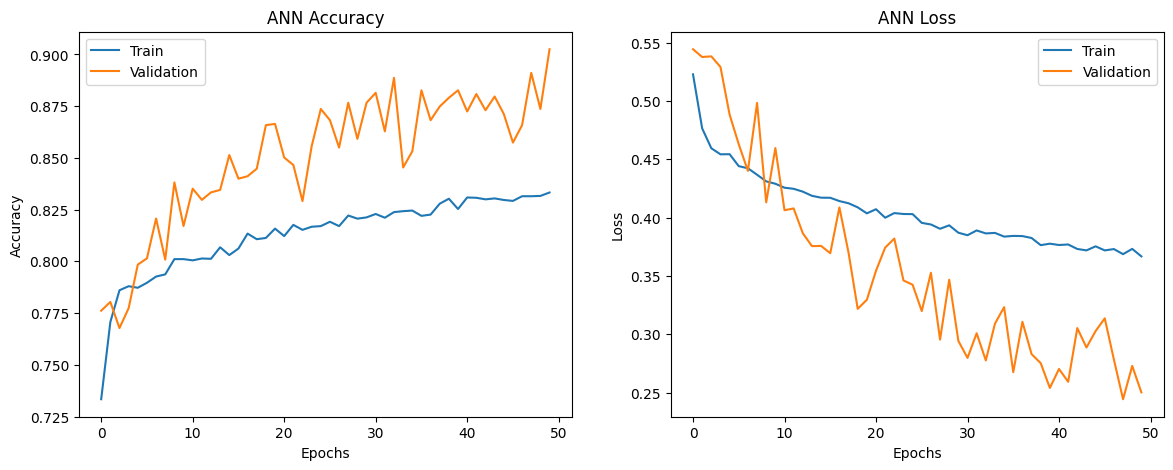

In [8]:
# Used for report analysis (overfitting detection).
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("ANN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("ANN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.show()

###ANN Evaluation

In [9]:
#We evaluate ANN using all required metrics.
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

ann_accuracy = accuracy_score(y_test, y_pred)
ann_precision = precision_score(y_test, y_pred)
ann_recall = recall_score(y_test, y_pred)
ann_f1 = f1_score(y_test, y_pred)

print("ANN Accuracy:", ann_accuracy)
print("ANN Precision:", ann_precision)
print("ANN Recall:", ann_recall)
print("ANN F1 Score:", ann_f1)
print(classification_report(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN Accuracy: 0.7746979388770433
ANN Precision: 0.6025316455696202
ANN Recall: 0.5979899497487438
ANN F1 Score: 0.6002522068095839
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1009
           1       0.60      0.60      0.60       398

    accuracy                           0.77      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.77      0.77      0.77      1407



###ANN Confusion Matrix

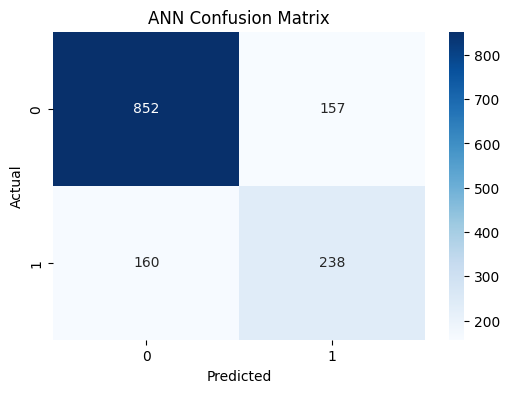

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###ANN ROC + AUC

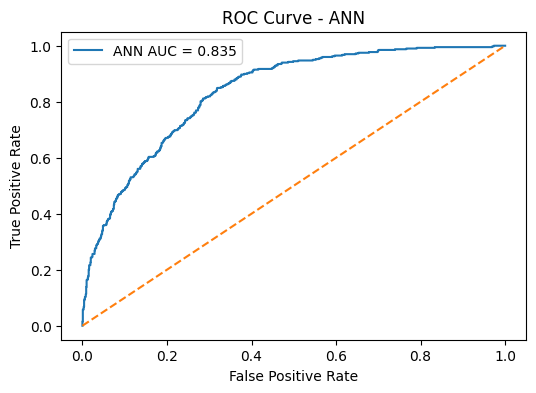

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="ANN AUC = {:.3f}".format(auc_score))
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve - ANN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

##Decision Tree Classifier (with Tuning)

###Train Basic Decision Tree

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
dt_pred = dt.predict(X_test)

###Evaluate Basic Decision Tree

In [13]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("DT Accuracy:", dt_accuracy)
print("DT Precision:", dt_precision)
print("DT Recall:", dt_recall)
print("DT F1 Score:", dt_f1)
print(classification_report(y_test, dt_pred))

DT Accuracy: 0.6908315565031983
DT Precision: 0.4556354916067146
DT Recall: 0.47738693467336685
DT F1 Score: 0.4662576687116564
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1009
           1       0.46      0.48      0.47       398

    accuracy                           0.69      1407
   macro avg       0.62      0.63      0.62      1407
weighted avg       0.70      0.69      0.69      1407



###Hyperparameter Tuning

In [14]:
param_grid = {
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_resampled, y_train_resampled)
best_dt = grid.best_estimator_

###Evaluate Tuned Decision Tree

In [15]:
dt_best_pred = best_dt.predict(X_test)

best_dt_accuracy = accuracy_score(y_test, dt_best_pred)
best_dt_precision = precision_score(y_test, dt_best_pred)
best_dt_recall = recall_score(y_test, dt_best_pred)
best_dt_f1 = f1_score(y_test, dt_best_pred)

print("Best DT Accuracy:", best_dt_accuracy)
print("Best DT Precision:", best_dt_precision)
print("Best DT Recall:", best_dt_recall)
print("Best DT F1 Score:", best_dt_f1)
print(classification_report(y_test, dt_best_pred))

Best DT Accuracy: 0.7405828002842928
Best DT Precision: 0.5322896281800391
Best DT Recall: 0.6834170854271356
Best DT F1 Score: 0.5984598459845984
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1009
           1       0.53      0.68      0.60       398

    accuracy                           0.74      1407
   macro avg       0.70      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407



###Confusion Matrix — Tuned DT

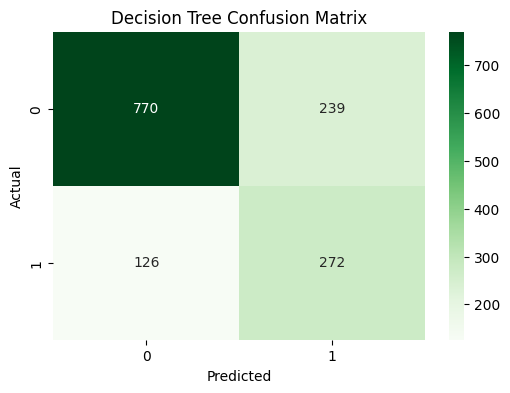

In [16]:
cm_dt = confusion_matrix(y_test, dt_best_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###ROC Curve + AUC (DT)

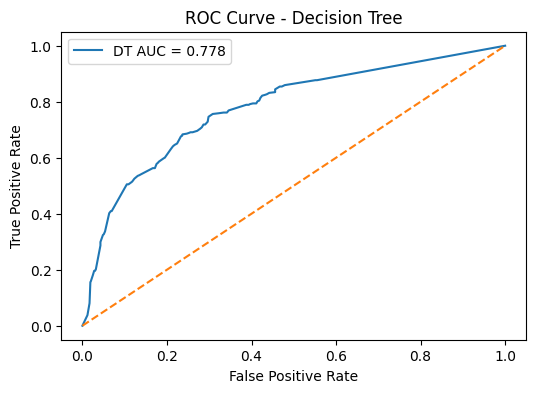

In [17]:
dt_best_prob = best_dt.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_best_prob)
auc_dt = roc_auc_score(y_test, dt_best_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label="DT AUC = {:.3f}".format(auc_dt))
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

##Model Comparison & Final Evaluation

###Create Comparison Table

In [18]:
comparison = pd.DataFrame({
    "Model": ["ANN", "Decision Tree (Tuned)"],
    "Accuracy": [ann_accuracy, best_dt_accuracy],
    "Precision": [ann_precision, best_dt_precision],
    "Recall": [ann_recall, best_dt_recall],
    "F1 Score": [ann_f1, best_dt_f1],
    "AUC Score": [auc_score, auc_dt]
})

comparison

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,ANN,0.774698,0.602532,0.597990,0.600252,0.834983
1,Decision Tree (Tuned),0.740583,0.532290,0.683417,0.598460,0.778309


###Comparison Plot

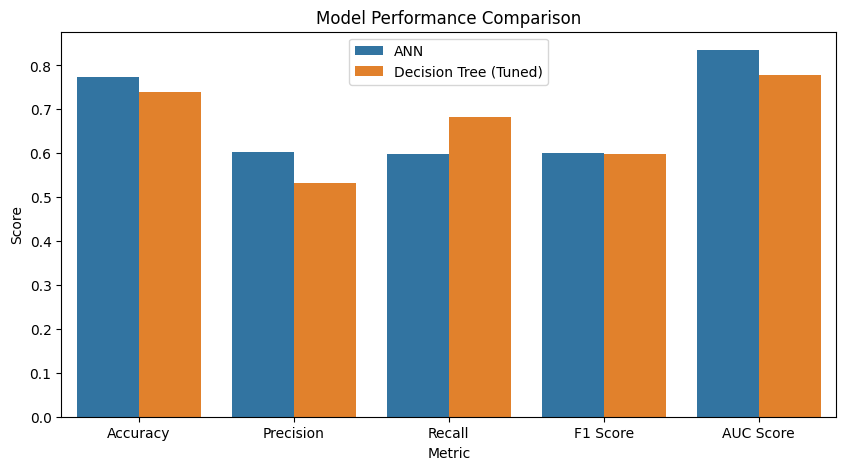

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=comparison.melt(id_vars="Model"), x="variable", y="value", hue="Model")
plt.title("Model Performance Comparison")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.legend()
plt.show()